In [1]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------
# TRAINING
#------------------------------------------------------------------
from unet_4block_conv import *
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
error = 15
Area = 100
image_shape = (128, 128) 
batch_size = 2
#----------------------
path_ori = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\originals_180919\originals'
path = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\ora_180919\Layers'
image_Paths, mask_Paths = create_dir_paths(path)
image_list , mask_list =  create_box_images(image_Paths, mask_Paths, error, Area)
print('Images and masks are created')
print(len(image_list), len(mask_list))     
data = SegmentationDataset(image_list, mask_list, image_shape)
dataloaders = torch.utils.data.DataLoader(data, batch_size)

#----------------------
# Model 
input_channels = 3
num_classes = 3
learning_rate = 1e-3  
epochs = 301
loss_fn  =  DiceLoss() 
folder_name = 'model_unet_3'


filters = 8
beta = 101
z_dim = 10
 # different learning rate and the same error as Porba Unet
#----------------------
if filters == 8:
    featureDim = 16384
if filters ==4:
    featureDim = 8192

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelPath = os.path.join(r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg', folder_name)
if not os.path.exists(modelPath):
    os.makedirs(modelPath)

#net = Probabilistic_UNET(input_channels, num_classes, filters, z_dim, image_shape, featureDim)
net = UNET(input_channels, num_classes) 
net.to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=0)
#summary(net)
#sum(p.numel() for p in net.parameters() if p.requires_grad) 
tloss, tloss_list = training_Unet(dataloaders, epochs, device, loss_fn, net, optimizer, modelPath)
plt.plot(tloss_list)


In [1]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------
# TRAINING
#------------------------------------------------------------------
from unet_4block_conv import *
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
error = 15
Area = 100
image_shape = (128, 128) 
batch_size = 2
#----------------------
path_ori = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\originals_180919\originals'
path = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\ora_180919\Layers'



78
76 76 76
76 76 76 76


ValueError: too many values to unpack (expected 2)

In [2]:
image_Paths, mask_Paths = create_dir_paths(path)
image_list , mask_list, _ =  create_box_images(image_Paths, mask_Paths, error, Area)
print('Images and masks are created')
print(len(image_list), len(mask_list))     
data = SegmentationDataset(image_list, mask_list, image_shape)
dataloaders = torch.utils.data.DataLoader(data, batch_size)

78
76 76 76
76 76 76 76
Images and masks are created
135 135


In [3]:
print(image_list[0].shape)

(139, 105, 3)


In [4]:
for X, y in dataloaders:
    print(X.shape)

torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2,

78
76 76 76
76 76 76 76
Images and masks are created
135 135
Current step: 0  Loss: 5589.08447265625  Recons: 0.7418190240859985  dkl : 279.4171447753906
Current step: 30  Loss: 759.8366088867188  Recons: 0.7441853284835815  dkl : 37.954620361328125
Current step: 60  Loss: 335.79864501953125  Recons: 0.6570471525192261  dkl : 16.757080078125
Saving Model0.torch
Current step: 0  Loss: 223.6140899658203  Recons: 0.6919004917144775  dkl : 11.146109580993652
Current step: 30  Loss: 139.64939880371094  Recons: 0.7263984680175781  dkl : 6.946149826049805
Current step: 60  Loss: 91.46733093261719  Recons: 0.6629618406295776  dkl : 4.540218353271484
Current step: 0  Loss: 59.744991302490234  Recons: 0.6771818399429321  dkl : 2.953390598297119
Current step: 30  Loss: 54.06808853149414  Recons: 0.7442220449447632  dkl : 2.6661934852600098
Current step: 60  Loss: 40.523277282714844  Recons: 0.6460108757019043  dkl : 1.9938633441925049
Current step: 0  Loss: 24.217920303344727  Recons: 0.616170644

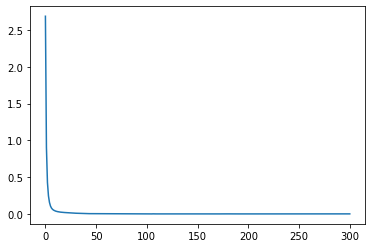

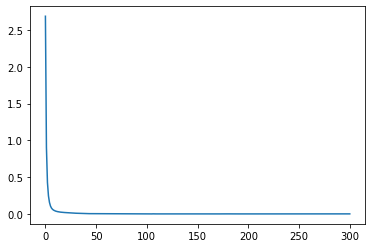

In [3]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------
# TRAINING
#------------------------------------------------------------------
from unet_4block_conv import *
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
error = 15
Area = 100
image_shape = (128, 128) 
batch_size = 2
#----------------------
path_ori = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\originals_180919\originals'
path = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\ora_180919\Layers'
image_Paths, mask_Paths = create_dir_paths(path)
image_list , mask_list =  create_box_images(image_Paths, mask_Paths, error, Area)
print('Images and masks are created')
print(len(image_list), len(mask_list))     
data = SegmentationDataset(image_list, mask_list, image_shape)
dataloaders = torch.utils.data.DataLoader(data, batch_size)

#----------------------
# Model 
input_channels = 3
num_classes = 3
learning_rate = 1e-3  
epochs = 301
loss_fn  =  DiceLoss() 
folder_name = 'model1'

beta = 20
filters = 8
z_dim = 10
 # different learning rate and the same error as Porba Unet
#----------------------
if filters == 8:
    featureDim = 16384
if filters ==4:
    featureDim = 8192

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelPath = os.path.join(r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg', folder_name)
if not os.path.exists(modelPath):
    os.makedirs(modelPath)

net = Probabilistic_UNET(input_channels, num_classes, filters, z_dim, image_shape, featureDim)
#net = UNET(input_channels, num_classes) 
net.to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=0)
#summary(net)
#sum(p.numel() for p in net.parameters() if p.requires_grad) 
tloss, tloss_list = training_probaUnet(dataloaders, epochs, device, beta, net, optimizer, modelPath)
#training_Unet(dataloaders, epochs, device, loss_fn, net, optimizer, modelPath)
plt.plot(tloss_list)


In [4]:
for step, batch in enumerate(dataloaders): 
    X, y = batch
    print(y.shape)

torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([2, 128, 128])
torch.Size([

In [20]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------
# TRAINING
#------------------------------------------------------------------
from unet_4block_conv import *
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
error = 25
Area = 80
image_shape = (128, 128) 
batch_size = 2
#----------------------
path_ori = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\originals_180919\originals'
path = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\ora_180919\Layers'
image_Paths, mask_Paths = create_dir_paths(path)
image_list , mask_list =  create_box_images(image_Paths, mask_Paths, error, Area)
print('Images and masks are created')
print(len(image_list), len(mask_list))   

# train_transform = A.Compose([A.Resize(image_shape[0],image_shape[1], always_apply=True),
#                             A.Rotate(limit=15,p=0.1),
#                             A.HorizontalFlip(p=0.5),
#                             ToTensorV2()])
                             
train_transform = A.Compose([
    A.Resize(image_shape[0],image_shape[1], always_apply=True),
    #A.RandomCrop(height=200, width = 200, p=0.2),
    A.PadIfNeeded(min_height=image_shape[0], min_width=image_shape[1], border_mode=cv2.BORDER_CONSTANT, 
                  always_apply=True),
    A.VerticalFlip(p=0.2),              
    A.Blur(p=0.2),
    A.RandomRotate90(p=0.2),
    A.ShiftScaleRotate(p=0.2, border_mode=cv2.BORDER_CONSTANT),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomSunFlare(p=0.2, src_radius=200),
    A.RandomShadow(p=0.2),
    A.RandomFog(p=0.2),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(transpose_mask=True)
]
)

data = SegmentationDataset_DA(image_list, mask_list, image_shape, transforms=train_transform)
dataloaders = torch.utils.data.DataLoader(data, batch_size)



78
76 76 76
76 76 76 76
Images and masks are created
143 143


In [2]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------
# TRAINING
#------------------------------------------------------------------
from unet_4block_conv import *
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
error = 25
Area = 80
image_shape = (128, 128) 
batch_size = 2
#----------------------
path_ori = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\originals_180919\originals'
path = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\ora_180919\Layers'
image_Paths, mask_Paths = create_dir_paths(path)
image_list , mask_list, _ =  create_box_images(image_Paths, mask_Paths, error, Area)
print('Images and masks are created')
print(len(image_list), len(mask_list))   

78
76 76 76
76 76 76 76
Images and masks are created
143 143


In [21]:
# image = image_list[0]
# mask =  mask_list[0]
# image  = image.astype(np.float32)
# mask  = mask.astype(np.float32)
# # train_transform = A.Compose([A.Resize(image_shape[0],image_shape[1], always_apply=True),
# #                             A.Rotate(limit=15,p=0.1),
# #                             A.HorizontalFlip(p=0.5),
# #                             ToTensorV2()])
# train_transform = A.Compose([
#     A.Resize(image_shape[0],image_shape[1], always_apply=True),
#     A.RandomCrop(height=200, width = 200, p=0.2),
#     A.PadIfNeeded(min_height=400, min_width=400, border_mode=cv2.BORDER_CONSTANT, 
#                   always_apply=True),
#     A.VerticalFlip(p=0.2),              
#     A.Blur(p=0.2),
#     A.RandomRotate90(p=0.2),
#     A.ShiftScaleRotate(p=0.2, border_mode=cv2.BORDER_CONSTANT),
#     A.RandomBrightnessContrast(p=0.2),
#     A.RandomSunFlare(p=0.2, src_radius=200),
#     A.RandomShadow(p=0.2),
#     A.RandomFog(p=0.2),
#     A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#     ToTensorV2(transpose_mask=True)
# ]
# )
# transformed = train_transform(image=image, mask=mask)
# image = transformed["image"]
# mask = transformed["mask"]
# image = torch.tensor(image, dtype=torch.float32)
# mask = torch.tensor(mask, dtype=torch.long) 
# print(image.shape, mask.shape)

for step, batch in enumerate(dataloaders): 
    X, y = batch
    print(X.shape)

torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2, 3, 128, 128])
torch.Size([2,

Current step: 0  Loss: 0.7614256739616394  
Current step: 30  Loss: 0.7852761745452881  
Current step: 60  Loss: 0.7704504132270813  
Saving Model0.torch
Current step: 0  Loss: 0.7352789640426636  
Current step: 30  Loss: 0.7344982624053955  
Current step: 60  Loss: 0.7117462158203125  
Current step: 0  Loss: 0.6347754001617432  
Current step: 30  Loss: 0.6959714889526367  
Current step: 60  Loss: 0.686574399471283  
Current step: 0  Loss: 0.608639121055603  
Current step: 30  Loss: 0.6397173404693604  
Current step: 60  Loss: 0.6722604036331177  
Current step: 0  Loss: 0.6173962354660034  
Current step: 30  Loss: 0.6436432600021362  
Current step: 60  Loss: 0.6388040781021118  
Current step: 0  Loss: 0.6170381307601929  
Current step: 30  Loss: 0.6370139122009277  
Current step: 60  Loss: 0.6181458234786987  
Saving Model5.torch
Current step: 0  Loss: 0.5889506340026855  
Current step: 30  Loss: 0.6207151412963867  
Current step: 60  Loss: 0.6368532180786133  
Current step: 0  Loss: 0

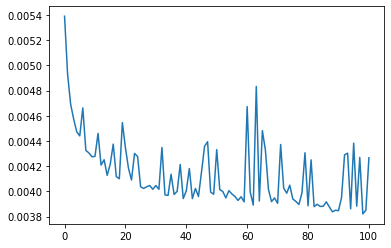

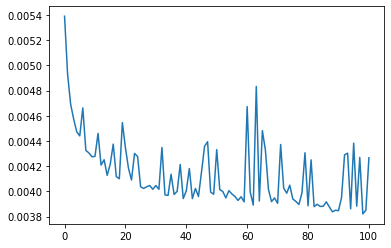

In [22]:
#----------------------
# Model 
input_channels = 3
num_classes = 3
learning_rate = 1e-3  
epochs = 101
loss_fn  =  DiceLoss() 
folder_name = 'model_unet_1_data_aug'


filters = 8
beta = 101
z_dim = 10
 # different learning rate and the same error as Porba Unet
#----------------------
if filters == 8:
    featureDim = 16384
if filters ==4:
    featureDim = 8192

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelPath = os.path.join(r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg', folder_name)
if not os.path.exists(modelPath):
    os.makedirs(modelPath)

#net = Probabilistic_UNET(input_channels, num_classes, filters, z_dim, image_shape, featureDim)
net = UNET(input_channels, num_classes) 
net.to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=0)
#summary(net)
#sum(p.numel() for p in net.parameters() if p.requires_grad) 
tloss, tloss_list = training_Unet(dataloaders, epochs, device, loss_fn, net, optimizer, modelPath)
plt.plot(tloss_list)
